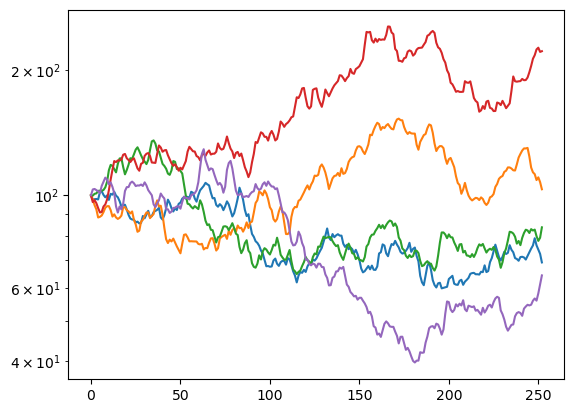

In [1]:
%run "header.ipynb"
process_type = 'ncmAR4MA3'
Ns = 252
Nr = 6
S0 = 100
draw = 5
mu = 0.06
sigma = 0.4
lam = [0.3, 0.2, 0.1, 0.05]
phi = [0.3, 0.2, 0.1]


df = MC(process_type, Ns, Nr, S0 = S0, mu = mu, sigma = sigma, draw = draw,\
        lam = lam, phi = phi, returned = 'psz')

In [2]:
prices = pd.read_csv('prices.csv')
prices

,TS1,TS2,TS3,TS4,TS5
0,0.000000,-0.030316,0.012626,0.016297,0.029420
1,-0.003916,-0.014709,-0.000924,0.003666,0.003383
2,0.006498,-0.018959,-0.003216,0.000016,-0.018175
3,0.005364,0.015515,-0.010126,0.009355,0.026024
4,-0.017799,0.028497,-0.005138,0.003650,0.016248
...,...,...,...,...,...
247,0.004238,-0.009577,0.006318,0.004343,0.005339
248,-0.005212,0.017364,-0.002193,0.006991,0.003865
249,-0.012368,-0.018243,0.007445,-0.001480,0.010870
250,0.005042,0.002994,-0.001914,-0.004523,0.004916


<AxesSubplot:>

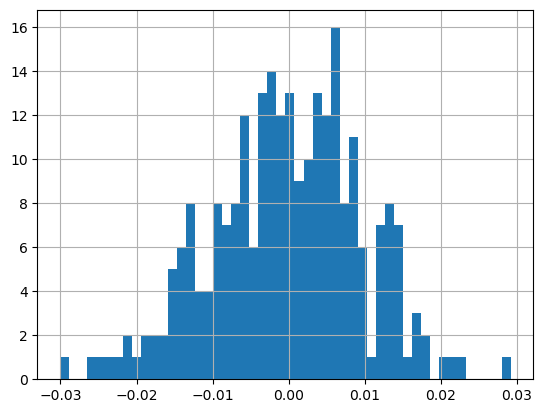

In [3]:
prices['TS1'].hist(bins = 50)

In [4]:
prices.sum()

TS1   -0.068015
TS2    0.226501
TS3    0.270650
TS4    0.126485
TS5    0.188507
dtype: float64

In [5]:
prices.std()*np.sqrt(252)

TS1    0.156223
TS2    0.473988
TS3    0.153879
TS4    0.100082
TS5    0.241436
dtype: float64

In [6]:
acf(prices['TS1'])

array([[1.        ],
       [0.99819411],
       [0.99733924],
       [0.99334716],
       [0.99217611],
       [0.98523667],
       [0.9606175 ],
       [0.95916527],
       [0.95267647],
       [0.9494635 ],
       [0.94856055],
       [0.94577808],
       [0.94178436],
       [0.93955469],
       [0.93937858]])

[[ 1.          1.        ]
 [-0.47201044 -0.22507819]
 [-0.04598538  0.20094687]
 [-0.05399695  0.1929353 ]
 [-0.09698073  0.14995152]
 [-0.04761457  0.19931768]
 [-0.14524688  0.10168537]
 [-0.17172188  0.07521037]
 [-0.10485854  0.14207371]
 [-0.08649186  0.16044039]
 [-0.14709311  0.09983914]
 [-0.16644945  0.0804828 ]
 [-0.22358055  0.02335171]
 [-0.04000337  0.20692888]
 [-0.10088273  0.14604952]
 [-0.10831284  0.13861941]
 [-0.07580044  0.17113181]
 [-0.02742082  0.21951143]
 [-0.08855803  0.15837422]
 [-0.04106206  0.20587019]
 [-0.15085129  0.09608096]
 [-0.12012832  0.12680393]
 [-0.10035155  0.1465807 ]
 [-0.19425684  0.05267541]
 [-0.06030337  0.18662888]]
[[ 1.          1.        ]
 [-0.31525568 -0.06832343]
 [-0.44404935 -0.1971171 ]
 [-0.43243962 -0.18550737]
 [-0.22615587  0.02077638]
 [-0.20227618  0.04465608]
 [-0.27356346 -0.02663121]
 [-0.06554158  0.18139067]
 [-0.20755611  0.03937614]
 [-0.16388204  0.08305021]
 [-0.08940308  0.15752917]
 [-0.1384378   0.10849445]


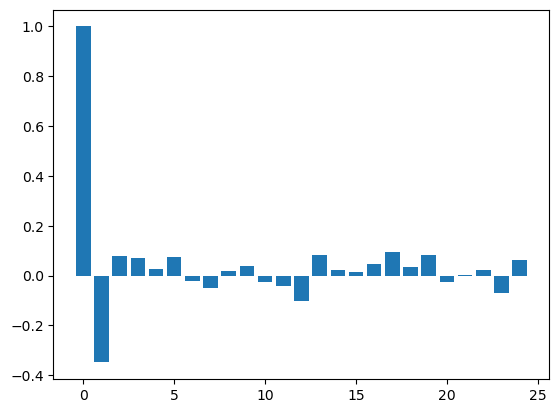

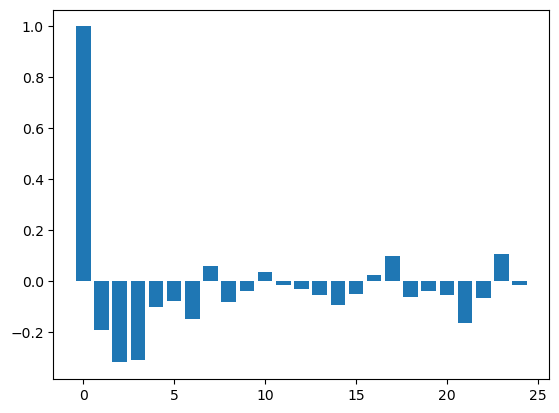

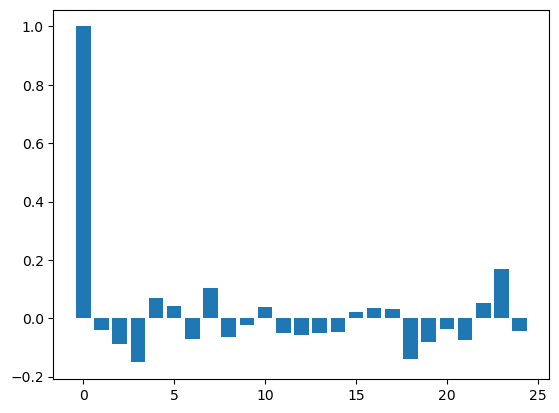

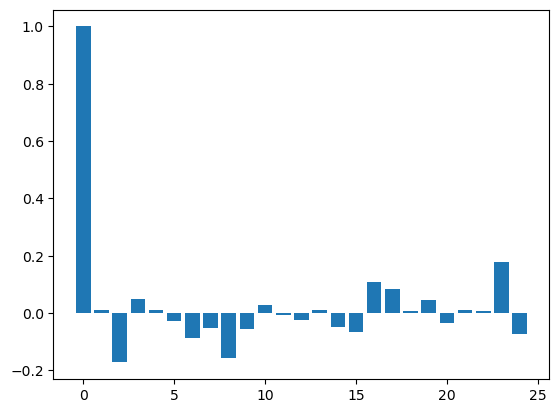

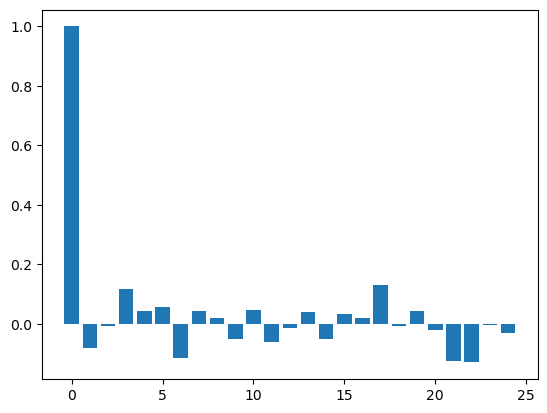

In [30]:
%run "header.ipynb"
draw_acf(prices, max_order = 30, stat_tools = True)

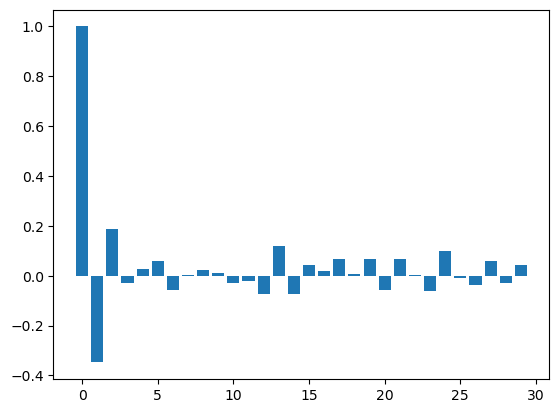

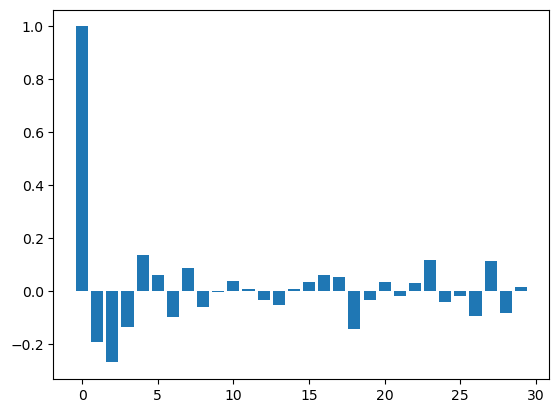

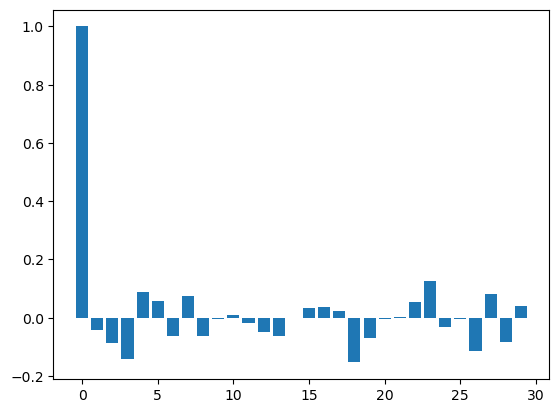

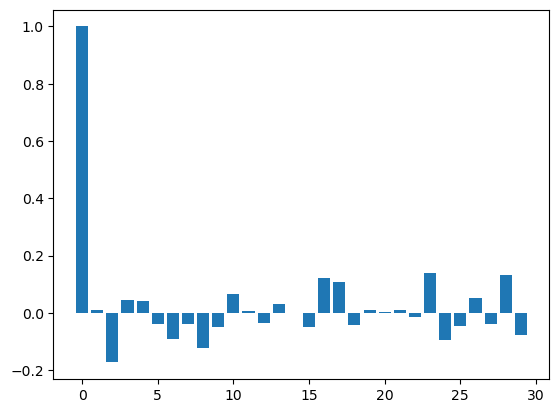

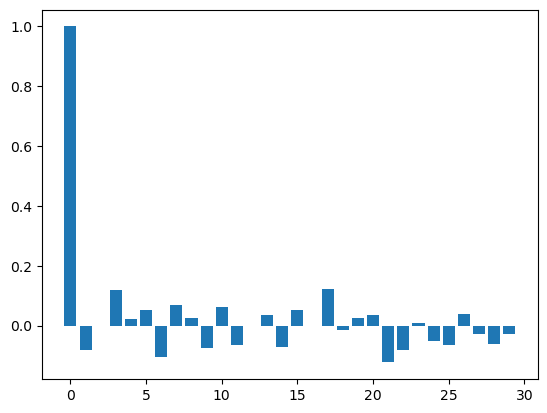

In [13]:
%run "header.ipynb"
draw_acf(prices, max_order = 30, stat_tools = False)

# Although insignificant, there is a difference between custom and library function outputs, why ?

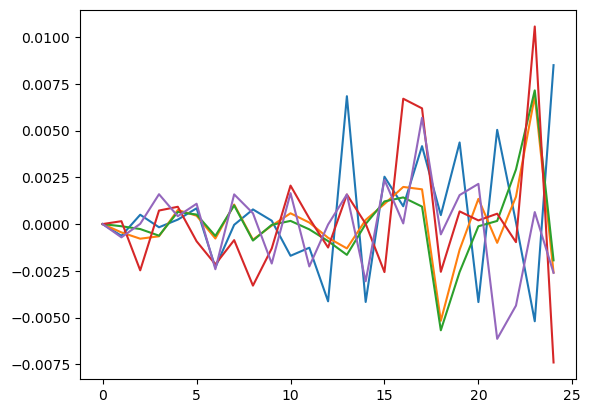

In [27]:
mine = acf(prices, max_order = 25)

first_f = stattools.acf(prices.loc[:, 'TS' + str(1)])
theirs = np.zeros([len(first_f), 5])
for run in range(1,6):
    theirs[:, run-1] = stattools.acf(prices.loc[:, 'TS' + str(run)])

plt.plot(range(25), mine - theirs)
plt.show()